# Data Exploration on SW-620

SW-620_A.txt: Edge list (source-target node pairs)

SW-620_edge_labels.txt: Labels for each edge

SW-620_node_labels.txt: Labels for each node

SW-620_graph_indicator.txt: Indicates which graph each node belongs to

SW-620_graph_labels.txt: Labels for each graph (for classification)

SW-620_label_readme.txt: Describes label meanings

In [12]:
import os
# List files in the data directory containing the actual dataset
inner_dir = "data/SW-620/raw"
os.listdir(inner_dir)


['SW-620_A.txt',
 'SW-620_edge_labels.txt',
 'SW-620_graph_indicator.txt',
 'SW-620_graph_labels.txt',
 'SW-620_label_readme.txt',
 'SW-620_node_labels.txt']

Total graphs: 40,532

Total nodes: 1,056,253

Total edges: 2,276,774

Graph labels (target classes): [0, 1] → binary classification

Node labels: 65 unique types (from 0 to 64)

Edge labels: 3 types → [0, 1, 2]

In [13]:
import pandas as pd

# Load all files into DataFrames
edge_list = pd.read_csv(os.path.join(inner_dir, 'SW-620_A.txt'), header=None)
edge_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_edge_labels.txt'), header=None)
node_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_node_labels.txt'), header=None)
graph_indicator = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_indicator.txt'), header=None)
graph_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_labels.txt'), header=None)

# Rename columns for clarity
edge_list.columns = ['source', 'target']
edge_labels.columns = ['edge_label']
node_labels.columns = ['node_label']
graph_indicator.columns = ['graph_id']
graph_labels.columns = ['graph_label']

# Show basic information about each
{
    "num_graphs": graph_labels.shape[0],
    "num_nodes": graph_indicator.shape[0],
    "num_edges": edge_list.shape[0],
    "unique_graph_labels": graph_labels['graph_label'].unique().tolist(),
    "unique_node_labels": node_labels['node_label'].unique().tolist(),
    "unique_edge_labels": edge_labels['edge_label'].unique().tolist(),
}


{'num_graphs': 40532,
 'num_nodes': 1056253,
 'num_edges': 2276774,
 'unique_graph_labels': [1, 0],
 'unique_node_labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 'unique_edge_labels': [0, 1, 2]}

### Graph Label Distribution

#### Graph Label Distribution
The dataset is fairly balanced between the two classes (0 and 1), which is good for classification tasks.

#### Node Label Distribution
Node labels span from 0 to 64.
Some node types appear much more frequently than others, indicating varied node roles.

#### Edge Label Distribution
There are 3 types of edge labels (0, 1, 2).
Label 0 dominates, but the others are still significant

C:\Users\deez\AppData\Local\Temp\ipykernel_15980\353903914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=graph_labels['graph_label'], palette="pastel")


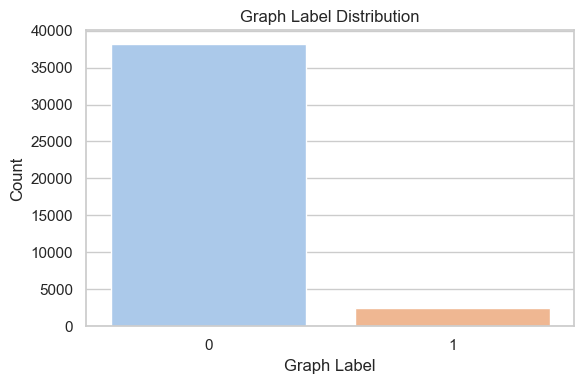

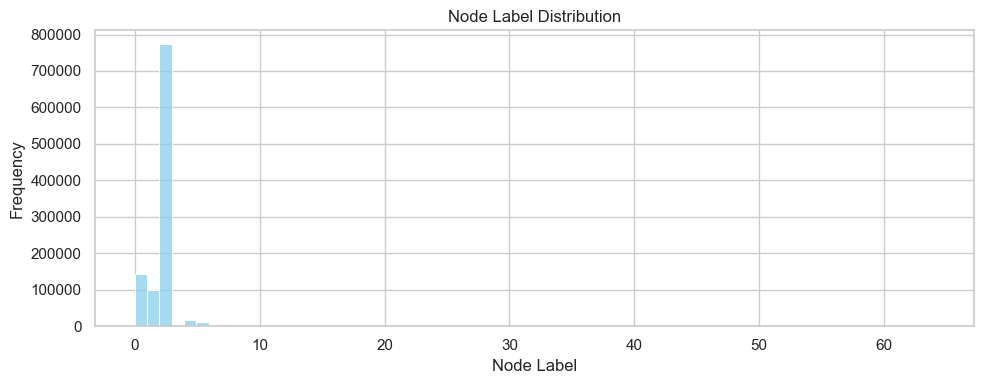

C:\Users\deez\AppData\Local\Temp\ipykernel_15980\353903914.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=edge_labels['edge_label'], palette="muted")


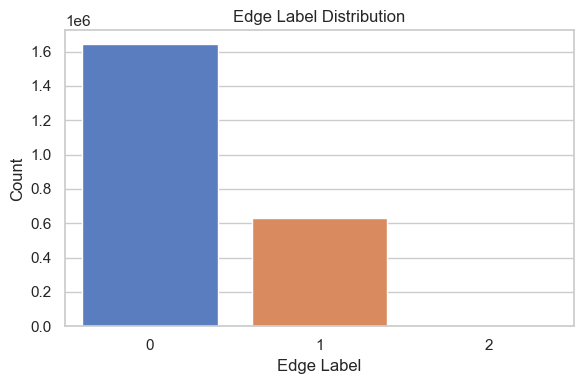

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual theme
sns.set_theme(style="whitegrid")

# Plot 1: Graph label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=graph_labels['graph_label'], palette="pastel")
plt.title("Graph Label Distribution")
plt.xlabel("Graph Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 2: Node label distribution
plt.figure(figsize=(10, 4))
sns.histplot(node_labels['node_label'], bins=65, kde=False, color='skyblue')
plt.title("Node Label Distribution")
plt.xlabel("Node Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 3: Edge label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=edge_labels['edge_label'], palette="muted")
plt.title("Edge Label Distribution")
plt.xlabel("Edge Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [17]:
# Re-import necessary libraries due to kernel reset
import zipfile
import os
import pandas as pd

# Define paths again after kernel reset
zip_path = "/mnt/data/SW-620.zip"
extract_dir = "/mnt/data/SW-620"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Path to inner dataset directory
inner_dir = os.path.join(extract_dir, 'SW-620')

# Load all files into DataFrames
edge_list = pd.read_csv(os.path.join(inner_dir, 'SW-620_A.txt'), header=None)
edge_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_edge_labels.txt'), header=None)
node_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_node_labels.txt'), header=None)
graph_indicator = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_indicator.txt'), header=None)
graph_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_labels.txt'), header=None)

# Rename columns for clarity
edge_list.columns = ['source', 'target']
edge_labels.columns = ['edge_label']
node_labels.columns = ['node_label']
graph_indicator.columns = ['graph_id']
graph_labels.columns = ['graph_label']

# Now continue with the graph visualization
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Step 1: Pick a random graph ID
random_graph_id = np.random.randint(1, graph_labels.shape[0] + 1)

# Step 2: Find nodes belonging to this graph
node_indices = graph_indicator[graph_indicator['graph_id'] == random_graph_id].index

# Step 3: Build the graph from the edge list
global_to_local = {idx: i for i, idx in enumerate(node_indices)}
edges_in_graph = edge_list[
    edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
].copy()

edges_in_graph['source'] = edges_in_graph['source'].map(global_to_local)
edges_in_graph['target'] = edges_in_graph['target'].map(global_to_local)

# Create a NetworkX graph
G = nx.Graph()
G.add_edges_from(edges_in_graph[['source', 'target']].values)

# Add node labels as attributes
local_node_labels = node_labels.loc[node_indices].reset_index(drop=True)
node_label_dict = {i: lbl for i, lbl in enumerate(local_node_labels['node_label'])}
nx.set_node_attributes(G, node_label_dict, name='label')

# Step 4: Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
node_colors = list(node_label_dict.values())
nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    with_labels=False,
    node_size=50,
    edge_color='gray'
)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label="Node Label")
plt.title(f"Graph ID: {random_graph_id} (Label = {graph_labels.iloc[random_graph_id - 1, 0]})")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/SW-620.zip'